Segmentasi basis penjual untuk memahami profil spesifik yang ada dalam basis pelanggan sehingga beberapa tindakan pemasaran dapat dipersonalisasi untuk setiap segmen

# UPLOAD DOKUMEN KE JUPYTER NOTEBOOK

In [1]:
## import library dan isi data Live pada python
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


data = pd.read_csv ('Live.csv',index_col=0)
data.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_id,,,,,,,,,,,,,,,
246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
## melihat statistik dari isi data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# MENGHAPUS DATA YANG TIDAK DIPERLUKAN

In [3]:
## drop data yang kosong
databaru = data.dropna(axis=1)
databaru.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,,
246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


# MENGUBAH DATA MENJADI NUMERIK

In [4]:
## status_type dan status published diubah menjadi integer menggunakan encoder agar dapat dilakukan perhitungan pada data
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

labelEncoder.fit(databaru['status_type'])
databaru['status_type'] = labelEncoder.transform(databaru['status_type'])

labelEncoder.fit(databaru['status_published'])
databaru['status_published'] = labelEncoder.transform(databaru['status_published'])

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [5]:
databaru.head() ## hasil dari data status type berubah menjadi integer

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,,
246675545449582_1649696485147474,3,3949,529,512,262,432,92,3,1,1,0
246675545449582_1649426988507757,1,3917,150,0,0,150,0,0,0,0,0
246675545449582_1648730588577397,3,3921,227,236,57,204,21,1,1,0,0
246675545449582_1648576705259452,1,3920,111,0,0,111,0,0,0,0,0
246675545449582_1645700502213739,1,3832,213,0,0,204,9,0,0,0,0


# MELAKUKAN PREPROCESSING DAN CLUSTERING DENGAN ALGORITMA K-MEANS

In [6]:
## mengubah data ke array agar dapat dilakukan perhitungan nilai pada data csv
X = databaru.iloc[:, 3:]
X = np.array(X)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


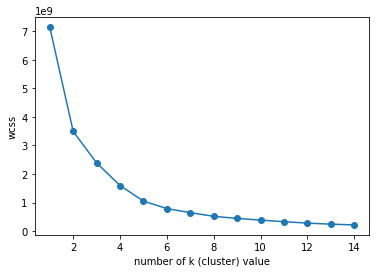

In [7]:
## melakukan standarisasi data dan mengitung K means
from sklearn import preprocessing
df = preprocessing.scale(databaru)
df = pd.DataFrame(df)

from sklearn.cluster import KMeans
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia : calculate wcss
    
plt.plot(range(1,15), wcss, '-o')
plt.xlabel('number of k (cluster) value')
plt.ylabel('wcss')
plt.show()

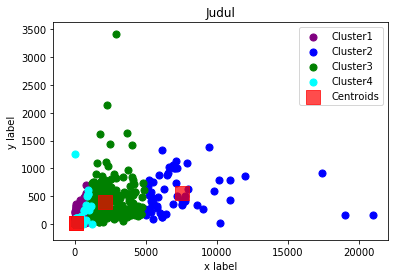

In [8]:
## Fitting kmeans ke dataset dengan nilai k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

## visualisasi cluster dengan k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Judul')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend()
plt.show()

In [9]:
X

array([[512, 262, 432, ...,   1,   1,   0],
       [  0,   0, 150, ...,   0,   0,   0],
       [236,  57, 204, ...,   1,   0,   0],
       ...,
       [  0,   0,   1, ...,   0,   0,   0],
       [ 12,  22, 349, ...,   0,   0,   0],
       [  0,   0,  17, ...,   0,   0,   0]], dtype=int64)

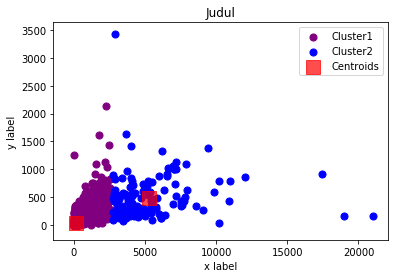

In [13]:
## Fitting Kmeans 2 cluster dengan k=2
km4=KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

## Visualisasi 2 cluster
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Judul')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend()
plt.show()

# CLUSTERING DENGAN GAUSSIAN MIXTURE MODEL DAN DBSCAN

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


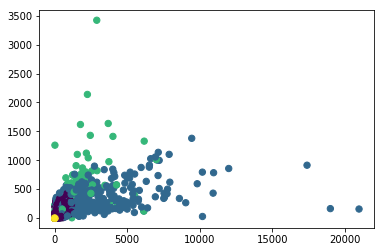

In [18]:
## Clustering dengan Gaussian Mixture
from sklearn.mixture import GaussianMixture

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=4).fit(X_scaled)
labels = gmm.predict(X_scaled)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0, 0.5, 'Feature 1')

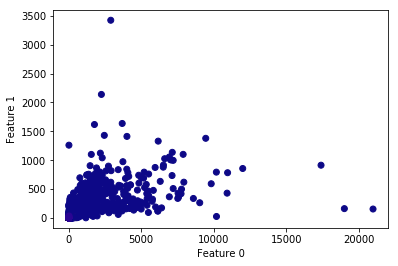

In [23]:
## Clustering dengan DBScan
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## cluster data ke 2 cluster
dbscan = DBSCAN(eps=0.123, min_samples = 4)
clusters = dbscan.fit_predict(X_scaled)

## visualisasi cluster dengan DBScan
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# MENCARI PCA - FA SETELAH PREPROCESSING (NORMALISASI)

In [25]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FactorAnalysis

X_2 = databaru.iloc[:, :-1].values
Y_2 = databaru.iloc[:, 3:].values

In [26]:
## Standarisasi data sebelum direduksi
X_std = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# LDA
#lda = LinearDiscriminantAnalysis(n_components=2)
#X_lda = lda.fit(X_2, Y_2).transform(X_2)

# FA
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_2)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# MENCARI PLOT PCA

In [27]:
df_pca = pd.DataFrame(X_pca)
df_pca.index = databaru.index
df_pca.columns = ['PC1','PC2']
df_pca.head()

,PC1,PC2
status_id,,
246675545449582_1649696485147474,2.159473,-0.051607
246675545449582_1649426988507757,-0.609379,-0.019836
246675545449582_1648730588577397,0.112927,-0.064211
246675545449582_1648576705259452,-0.623863,0.035062
246675545449582_1645700502213739,-0.476258,-0.107269


In [28]:
print(pca.explained_variance_ratio_) 

[0.40274632 0.13031157]


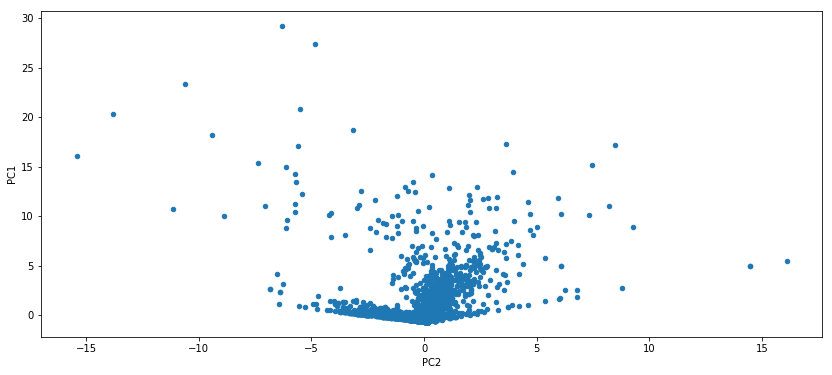

In [29]:
ax = df_pca.plot(kind='scatter', x='PC2', y='PC1', figsize=(14,6))

# FITTING K-MEANS DENGAN PCA

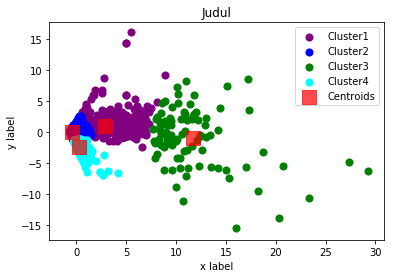

In [30]:
## Fitting kmeans to PCA dataframe with k=4
km_pca=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pca = km_pca.fit_predict(X_pca)

## Visualizing the clusters for k=4
plt.scatter(X_pca[y_pca==0,0],X_pca[y_pca==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X_pca[y_pca==1,0],X_pca[y_pca==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X_pca[y_pca==2,0],X_pca[y_pca==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X_pca[y_pca==3,0],X_pca[y_pca==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km_pca.cluster_centers_[:,0], km_pca.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Judul')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend()
plt.show()

# PCA TANPA NORMALISASI

In [37]:
# PCA
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_2)

df_pca2 = pd.DataFrame(X_pca2)
df_pca2.index = databaru.index
df_pca2.columns = ['PC1','PC2']
df_pca2.head()

,PC1,PC2
status_id,,
246675545449582_1649696485147474,498.845933,361.369668
246675545449582_1649426988507757,450.264862,-252.411221
246675545449582_1648730588577397,460.220643,1.447190
246675545449582_1648576705259452,452.517202,-262.490478
246675545449582_1645700502213739,366.407157,-235.181869


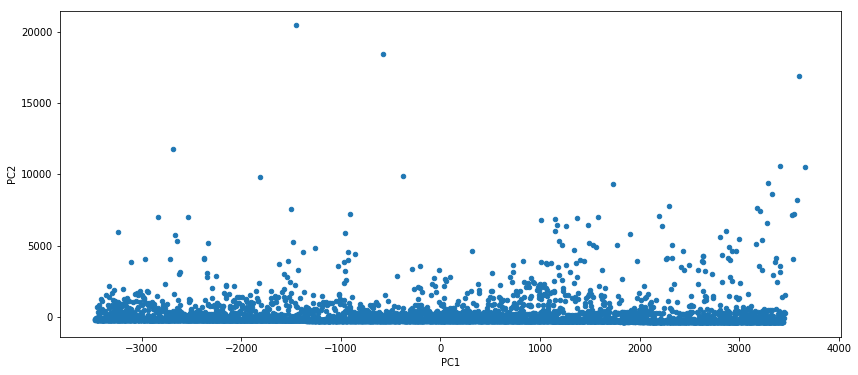

In [48]:
ax2 = df_pca2.plot(kind='scatter', x='PC1', y='PC2', figsize=(14,6))

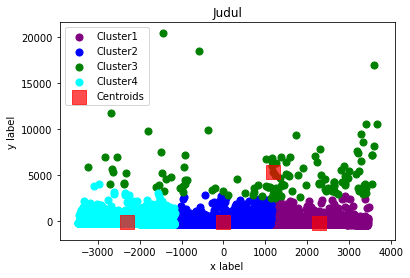

In [40]:
## Fitting kmeans to PCA dataframe with k=4
km_pca2=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pca2 = km_pca2.fit_predict(X_pca2)

## Visualizing the clusters for k=4
plt.scatter(X_pca2[y_pca2==0,0],X_pca2[y_pca2==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X_pca2[y_pca2==1,0],X_pca2[y_pca2==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X_pca2[y_pca2==2,0],X_pca2[y_pca2==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X_pca2[y_pca2==3,0],X_pca2[y_pca2==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km_pca.cluster_centers_[:,0], km_pca.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Judul')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend()
plt.show()

In [27]:
# PCA 4 components
pca4 = PCA(n_components=4)
X_pca4 = pca4.fit_transform(X_2)
print(pca4.explained_variance_ratio_) 

[0.76374609 0.15659859 0.07738481 0.0020994 ]


# MENCARI PLOT FA

In [43]:
df_fa = pd.DataFrame(X_fa)
df_fa.index = databaru.index
df_fa.columns = ['FA1','FA2']
df_fa.head()

,FA1,FA2
status_id,,
246675545449582_1649696485147474,-0.245457,1.720310
246675545449582_1649426988507757,-0.229374,-0.346754
246675545449582_1648730588577397,-0.231382,0.207805
246675545449582_1648576705259452,-0.230882,-0.351265
246675545449582_1645700502213739,-0.186642,-0.229517


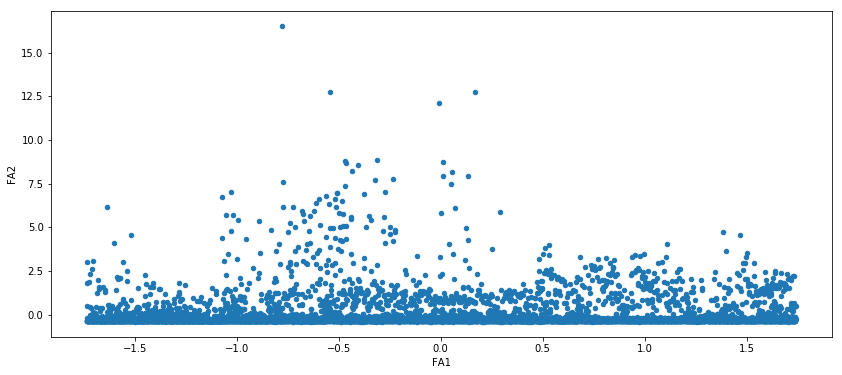

In [46]:
al = df_fa.plot(kind='scatter', x='FA1', y='FA2', figsize=(14,6))

# FITTING K-MEANS KE FA

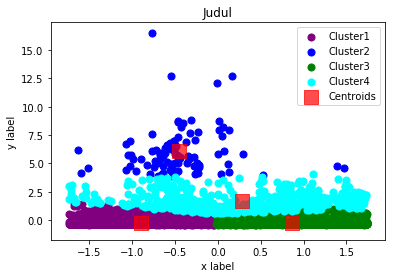

In [47]:
##Fitting kmeans to PCA dataframe with k=4
km_fa=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_fa = km_fa.fit_predict(X_fa)
#Visualizing the clusters for k=4
plt.scatter(X_fa[y_fa==0,0],X_fa[y_fa==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X_fa[y_fa==1,0],X_fa[y_fa==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X_fa[y_fa==2,0],X_fa[y_fa==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X_fa[y_fa==3,0],X_fa[y_fa==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km_fa.cluster_centers_[:,0], km_fa.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Judul')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend()
plt.show()

# SILHOUETTE K-MEANS

For n_clusters = 2 The average silhouette_score is : 0.7023138550785363
For n_clusters = 3 The average silhouette_score is : 0.5872310051340421
For n_clusters = 4 The average silhouette_score is : 0.6325238578481542
For n_clusters = 5 The average silhouette_score is : 0.5399622722404319
For n_clusters = 6 The average silhouette_score is : 0.463960242335838


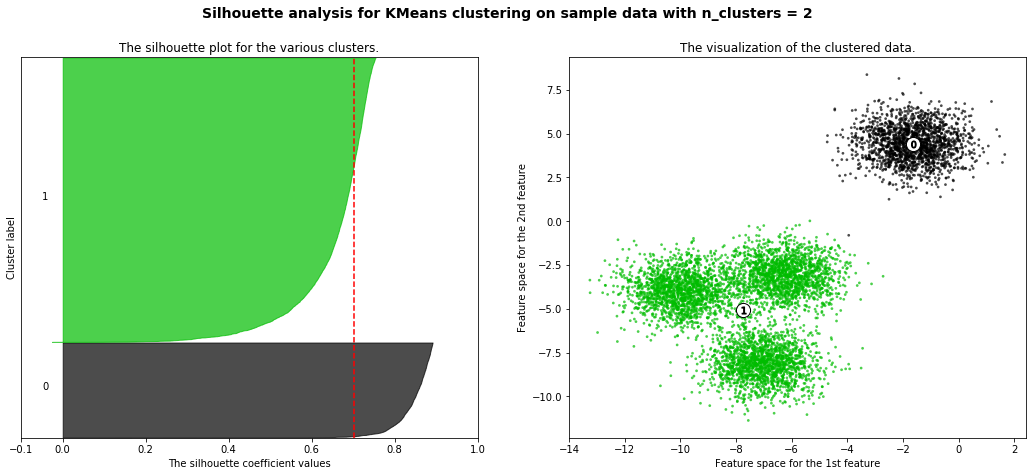

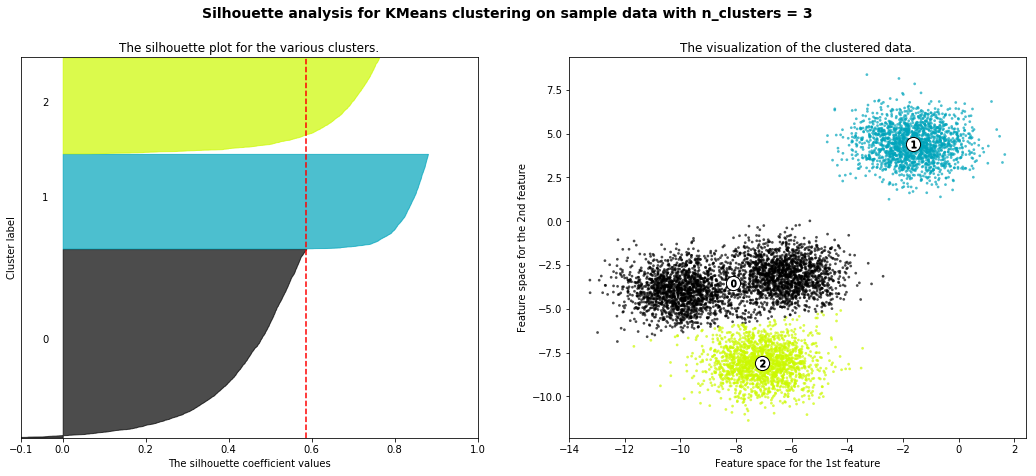

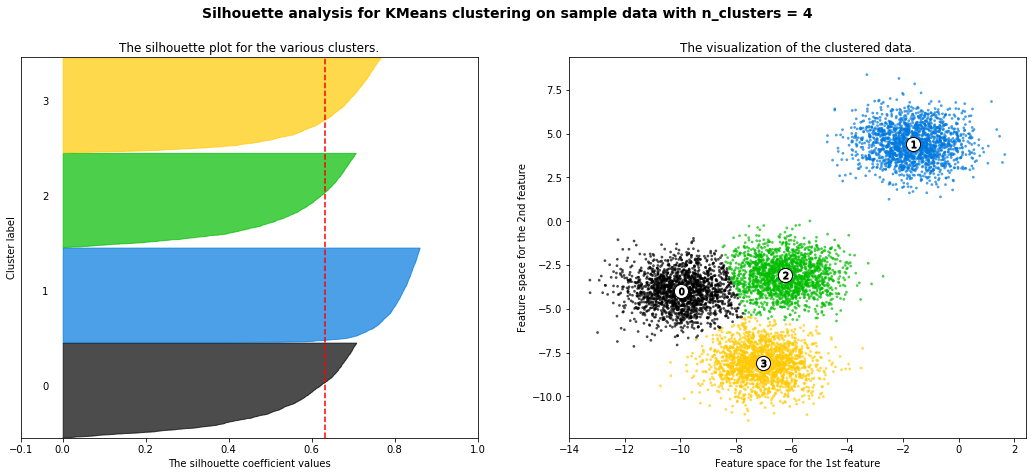

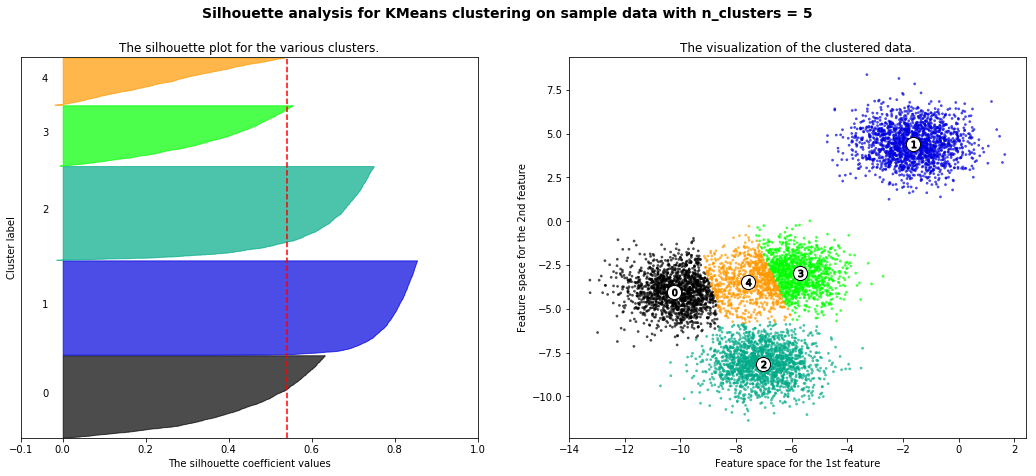

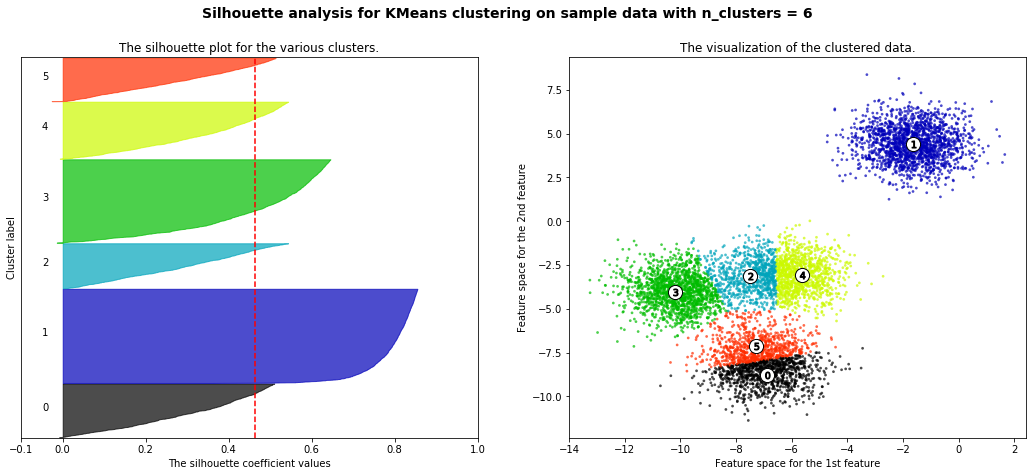

In [50]:
## perhitungan shiluete

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(len(databaru),
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# ANALISIS DARI SETIAP CLUSTER

In [55]:
labels = km4.labels_
k1,k2,k3,k4 = [X[np.where(labels==i)] for i in range(4)]
k1

array([[-4.93464763, -3.00511377],
       [-7.53101487, -6.96407662],
       [-4.89605153, -3.29942402],
       ...,
       [-6.03067458, -2.9961678 ],
       [-9.46356943, -3.25351585],
       [-4.08968614, -3.34915657]])

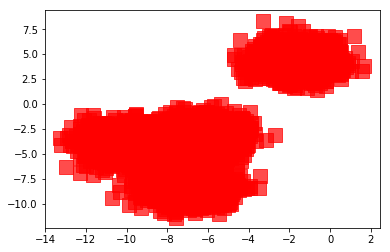

In [60]:
plt.scatter(k1[:,0], k1[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')

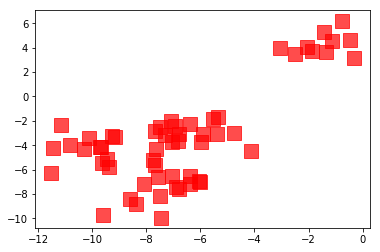

In [61]:
plt.scatter(k2[:,0], k2[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')

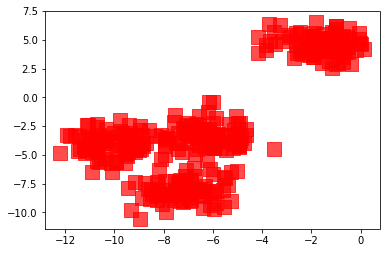

In [62]:
plt.scatter(k3[:,0], k3[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')

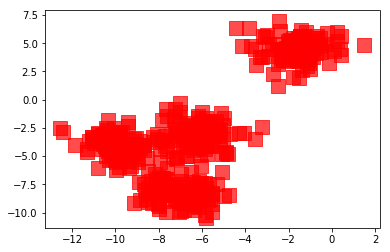

In [63]:
plt.scatter(k4[:,0], k4[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')

In [65]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = databaru.index.values
cluster_map['cluster'] = km4.labels_

In [87]:
print(cluster_map[cluster_map.cluster == 0].shape)
print(cluster_map[cluster_map.cluster == 1].shape)
print(cluster_map[cluster_map.cluster == 2].shape)
print(cluster_map[cluster_map.cluster == 3].shape)

(6257, 2)
(56, 2)
(337, 2)
(400, 2)


In [81]:
cluster_map.describe()

,cluster
count,7050.000000
mean,0.273759
std,0.796827
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


In [83]:
cluster1 = data
cluster1

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_id,,,,,,,,,,,,,,,
246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN


In [88]:
cluster1['cluster'] = km4.labels_
cluster1

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,cluster
status_id,,,,,,,,,,,,,,,,
246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,0
246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,0
246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,0
246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,0
246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,0
246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN,0
246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN,0
246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN,0
246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN,0


# STATISTIK DATA DARI SETIAP CLUSTER

In [93]:
cluster1[data['cluster'] == 0].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,cluster
count,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,0.0,0.0,0.0,0.0,6257.0
mean,109.903148,65.072079,17.233978,102.124980,6.606361,0.592297,0.343296,0.165575,0.067604,NaN,NaN,NaN,NaN,0.0
std,151.407807,182.149578,54.983835,143.373451,20.207284,2.980782,2.398202,1.490725,0.667860,NaN,NaN,NaN,NaN,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.0
25%,15.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.0
50%,43.000000,3.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.0
75%,154.000000,14.000000,2.000000,131.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.0
max,1397.000000,1122.000000,695.000000,924.000000,485.000000,139.000000,102.000000,51.000000,31.000000,NaN,NaN,NaN,NaN,0.0


In [89]:
cluster1[data['cluster'] == 1].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,cluster
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,0.0,0.0,0.0,0.0,56.0
mean,621.000000,7568.410714,562.196429,479.839286,122.142857,5.678571,8.875000,3.250000,1.214286,NaN,NaN,NaN,NaN,1.0
std,315.929566,3274.330248,341.056403,263.231511,77.366760,7.483575,6.761018,3.634431,1.423367,NaN,NaN,NaN,NaN,0.0
min,236.000000,4963.000000,25.000000,138.000000,5.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.0
25%,411.250000,5510.000000,285.500000,328.750000,50.000000,3.000000,4.750000,1.000000,0.000000,NaN,NaN,NaN,NaN,1.0
50%,542.500000,6578.500000,487.500000,428.000000,93.000000,4.500000,8.500000,2.000000,1.000000,NaN,NaN,NaN,NaN,1.0
75%,813.250000,7811.000000,808.750000,587.250000,196.500000,7.000000,12.000000,3.250000,2.000000,NaN,NaN,NaN,NaN,1.0
max,1959.000000,20990.000000,1379.000000,1737.000000,282.000000,57.000000,43.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,1.0


In [90]:
cluster1[data['cluster'] == 2].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,cluster
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,0.0,0.0,0.0,0.0,337.0
mean,567.753709,2135.833828,397.038576,431.851632,115.382789,11.878338,6.376855,1.412463,0.851632,NaN,NaN,NaN,NaN,2.0
std,539.835779,1023.165875,308.363492,424.464300,103.908207,35.024142,12.902466,2.608176,1.225451,NaN,NaN,NaN,NaN,0.0
min,56.000000,1076.000000,29.000000,50.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2.0
25%,233.000000,1354.000000,203.000000,163.000000,44.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2.0
50%,320.000000,1734.000000,339.000000,233.000000,87.000000,2.000000,4.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,2.0
75%,632.000000,2638.000000,506.000000,455.000000,144.000000,4.000000,6.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,2.0
max,2639.000000,4845.000000,3424.000000,1766.000000,657.000000,278.000000,157.000000,37.000000,8.000000,NaN,NaN,NaN,NaN,2.0


In [91]:
cluster1[data['cluster'] == 3].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,cluster
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,0.0,0.0,0.0,0.0,400.0
mean,1771.382500,77.367500,22.602500,1761.632500,6.692500,2.657500,0.290000,0.060000,0.050000,NaN,NaN,NaN,NaN,3.0
std,660.797006,165.319626,89.887591,661.902765,26.531354,7.503396,1.104059,0.348861,0.357519,NaN,NaN,NaN,NaN,0.0
min,945.000000,0.000000,0.000000,936.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,3.0
25%,1230.000000,10.000000,0.000000,1219.500000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,3.0
50%,1702.000000,19.500000,2.000000,1685.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,3.0
75%,2178.500000,51.000000,8.250000,2178.500000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,3.0
max,4710.000000,1186.000000,1260.000000,4710.000000,249.000000,65.000000,10.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,3.0
